# Clustering Customers

## Problem Statement:
Client has asked you to develop a model for one of the retail store.Develop a model to get sense of customers 
and classify them into different cohorts/groups. The model should be able to classify customers into different 
cohorts so that suitable marketing strategies can be used for individual cohort.


### 1)Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

### 2 ) Importing dataset & Exploratory Data Analysis

In [2]:
data=pd.read_csv('segmentation data.csv', encoding='ISO-8859-1')

In [3]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
data.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [5]:
data.shape, data.dtypes

((2000, 8),
 ID                 int64
 Sex                int64
 Marital status     int64
 Age                int64
 Education          int64
 Income             int64
 Occupation         int64
 Settlement size    int64
 dtype: object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [8]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

### 3) Univariate Analysis

0    1086
1     914
Name: Sex, dtype: int64
0    1007
1     993
Name: Marital status, dtype: int64
1    1386
2     291
0     287
3      36
Name: Education, dtype: int64
1    1113
0     633
2     254
Name: Occupation, dtype: int64
0    989
1    544
2    467
Name: Settlement size, dtype: int64


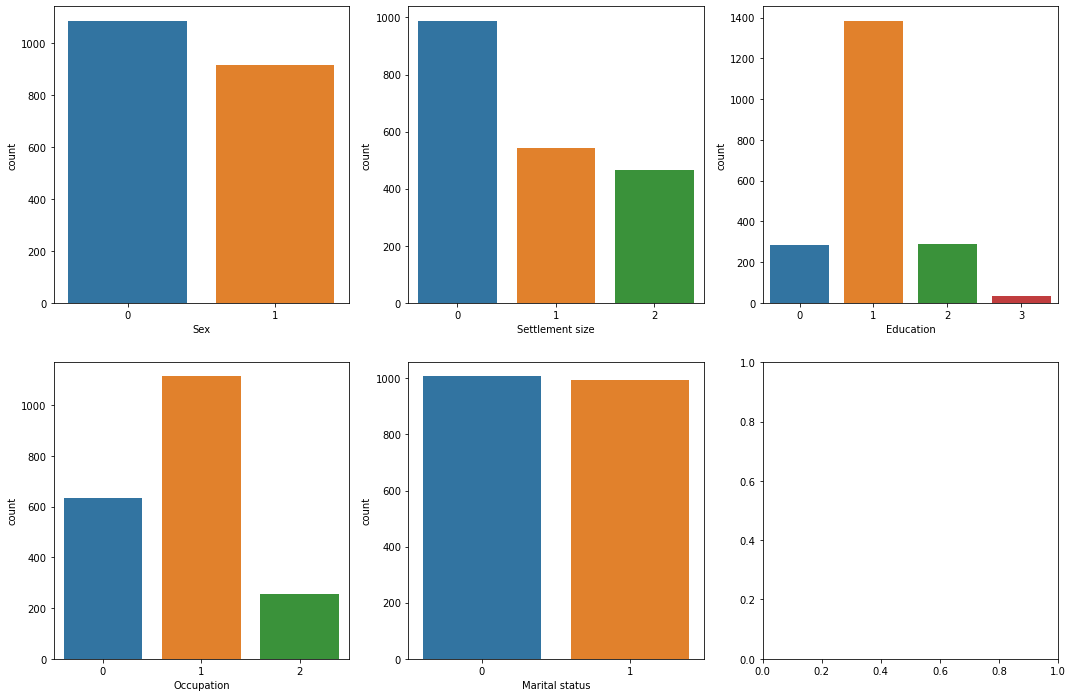

In [9]:
df=data[['Sex','Marital status', 'Education','Occupation','Settlement size']]
fig,axis=plt.subplots(2,3, figsize=(18,12))
j=0
for i in df.columns:
    m=j%3
    n=j%2
    print(df[i].value_counts())
    sns.countplot(df[i],ax=axis[n,m])
    j+=1
    

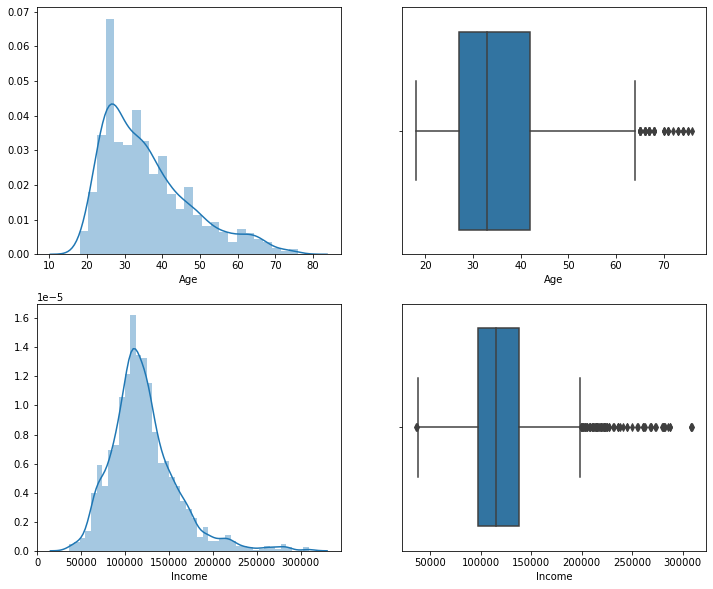

In [10]:
fig, axis=plt.subplots(2,2, figsize=(12,10))
j=0
for i in data[['Age', 'Income']].columns:
    sns.distplot(data[i], ax=axis[j,0])
    sns.boxplot(data[i], ax=axis[j,1])
    j+=1

### 4)Bivariate Analysis

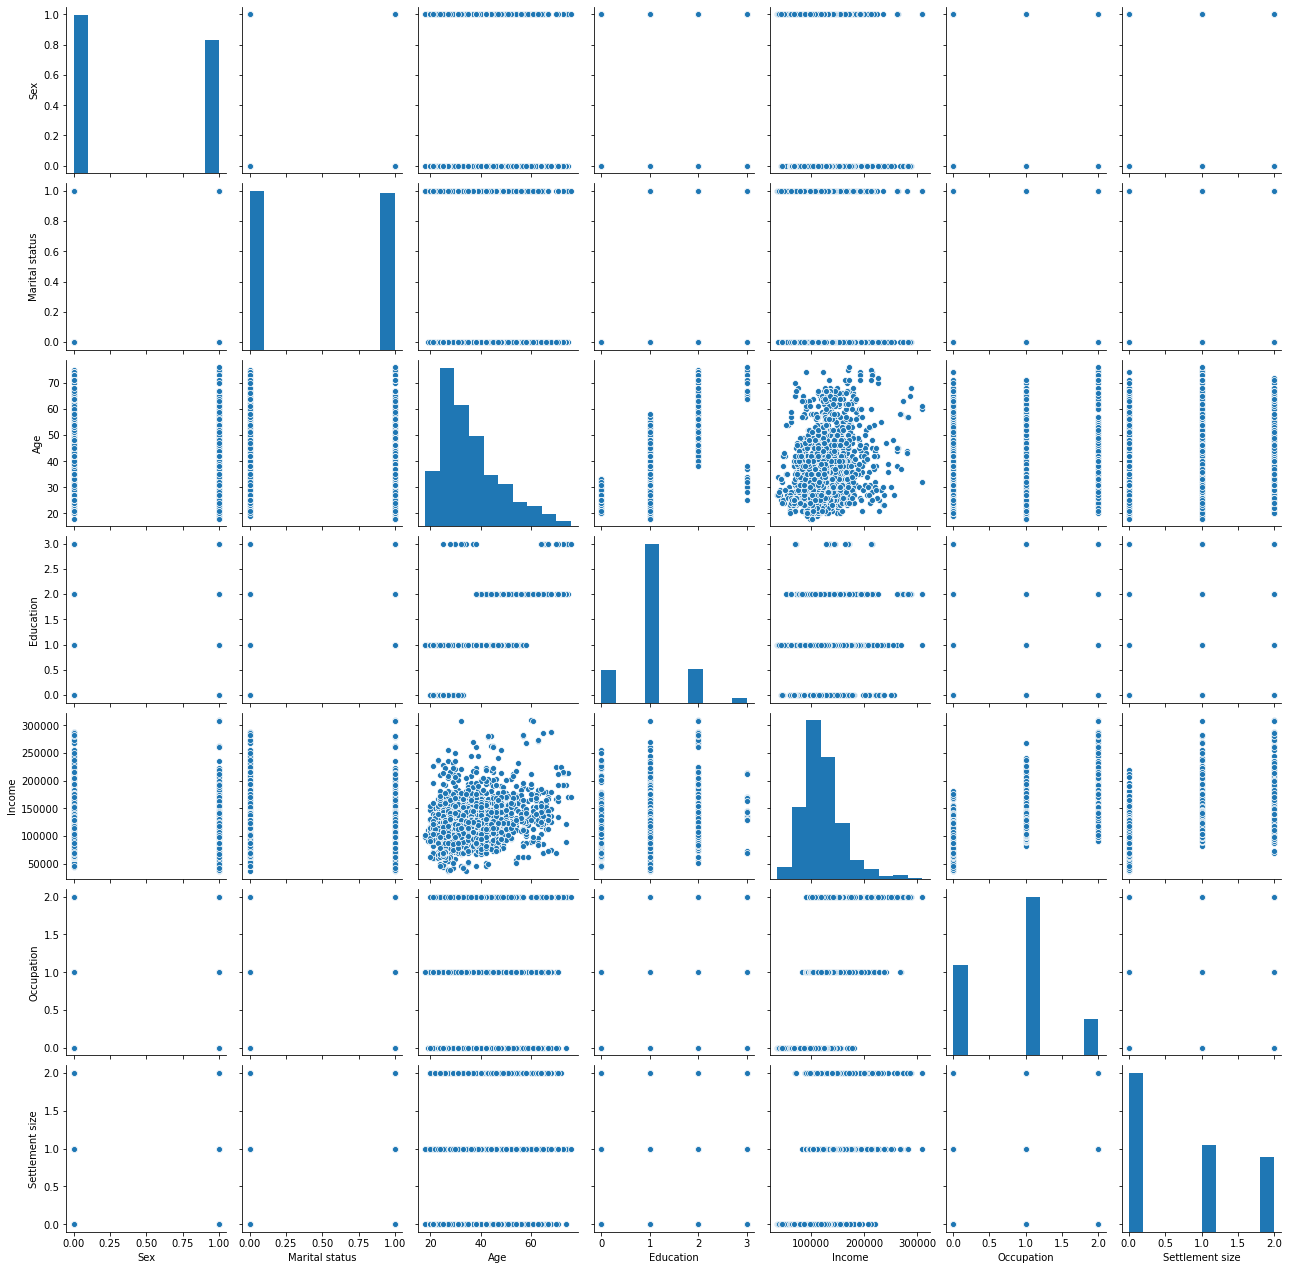

In [11]:
sns.pairplot(data.iloc[:,1:])

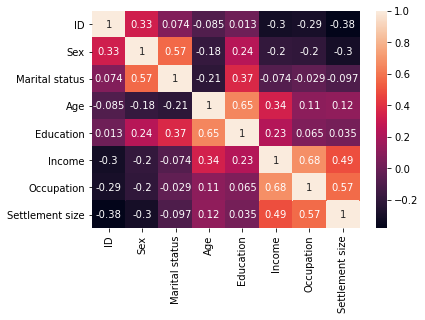

In [12]:
sns.heatmap(data.corr(), annot=True)

### 5) Data Preparation

In [13]:
data.drop(['ID'], axis=1, inplace=True)
data.head(1)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2


In [14]:
scaler= StandardScaler()
df=scaler.fit_transform(data)
df

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

### 6)Model

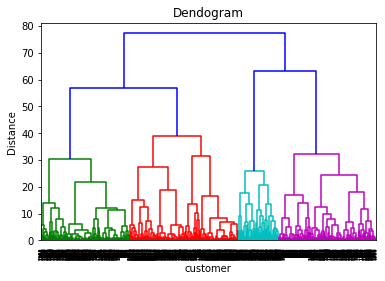

In [15]:
#heirarical clustering
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendogram')
plt.xlabel('customer')
plt.ylabel('Distance')
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(df)
y_hc

array([2, 3, 0, ..., 0, 0, 0])

In [17]:
data['cluster1']=y_hc
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster1
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,3
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [18]:
data.groupby(by='cluster1').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster1,,,,,,,
0,0.640986,0.445300,34.583975,0.992296,90807.328197,0.101695,0.023112
1,0.000000,0.000000,36.813472,0.673575,137369.343696,1.176166,1.245250
2,0.497925,0.717842,54.593361,2.120332,163924.684647,1.257261,1.219917
3,0.711864,1.000000,28.062147,1.000000,120399.591337,1.075330,0.843691


In [23]:
data.groupby(by='cluster1').count()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster2
cluster1,,,,,,,,
0,649,649,649,649,649,649,649,649
1,579,579,579,579,579,579,579,579
2,241,241,241,241,241,241,241,241
3,531,531,531,531,531,531,531,531


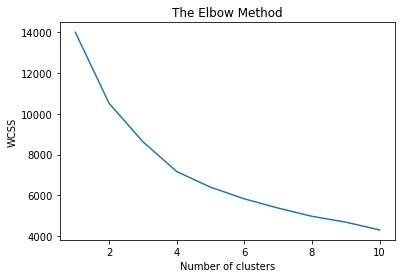

In [36]:
#K means clustering
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(df)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
km=KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans= km.fit_predict(df)
y_kmeans

array([0, 3, 1, ..., 1, 3, 1], dtype=int32)

In [38]:
data['cluster2']=y_kmeans
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster1,cluster2
0,0,0,67,2,124670,1,2,2,0
1,1,1,22,1,150773,1,2,3,3
2,0,0,49,1,89210,0,0,0,1
3,0,0,45,1,171565,1,1,1,2
4,0,0,53,1,149031,1,1,1,2


In [39]:
data.groupby(by='cluster2').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster1
cluster2,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,1.794677
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,0.246753
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,1.331579
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,1.856738


In [40]:
data.groupby(by='cluster2').count()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster1
cluster2,,,,,,,,
0,263,263,263,263,263,263,263,263
1,462,462,462,462,462,462,462,462
2,570,570,570,570,570,570,570,570
3,705,705,705,705,705,705,705,705
